In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv(r'D:\DATASET\titanic_csv.csv', usecols=['Survived', 'Age', 'Fare'] )

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
X= df.iloc[:, 1:]
y = df.iloc[:,0]

In [9]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
X_train.head(2)

,Age,Fare
51,30.0,86.5000
35,56.0,30.6958


In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [15]:
accuracy_score(y_test,y_pred)

0.5263157894736842

In [18]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6684210526315789

In [22]:
kbin_age = KBinsDiscretizer(n_bins=10, encode = 'ordinal', strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode ='ordinal', strategy = 'quantile')

In [23]:
trf = ColumnTransformer([
    ('first', kbin_age,[0]),
    ('second', kbin_fare,[1])
]) 

In [24]:
X_train_trf= trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [26]:
trf.named_transformers_['first'].bin_edges_ #Bin edges in first index[0]

array([array([ 0.92, 17.  , 23.  , 27.  , 31.  , 35.  , 37.6 , 44.7 , 49.  ,
              55.9 , 80.  ])                                                ],
      dtype=object)

In [29]:
trf.named_transformers_['second'].n_bins_ # number of bins in second index-[1] 

array([10])

In [30]:
output = pd.DataFrame ({
    'age': X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf': X_train_trf[:,1]
})

In [31]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                             bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_lables']= pd.cut(x=X_train['Fare'],
                             bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [34]:
output.sample(10)

,age,age_trf,fare,fare_trf,age_labels,fare_lables
84,27.0,3.0,211.5000,9.0,"(23.0, 27.0]","(153.462, 512.329]"
159,29.0,3.0,211.3375,9.0,"(27.0, 31.0]","(153.462, 512.329]"
74,29.0,3.0,66.6000,5.0,"(27.0, 31.0]","(55.671, 73.663]"
138,24.0,2.0,69.3000,5.0,"(23.0, 27.0]","(55.671, 73.663]"
117,36.0,5.0,71.0000,5.0,"(35.0, 37.6]","(55.671, 73.663]"
90,28.0,3.0,26.5500,2.0,"(27.0, 31.0]","(26.288, 30.0]"
7,2.0,0.0,21.0750,1.0,"(0.92, 17.0]","(13.0, 26.288]"
80,22.0,1.0,55.0000,4.0,"(17.0, 23.0]","(49.502, 55.671]"
139,48.0,7.0,76.7292,6.0,"(44.7, 49.0]","(73.663, 81.196]"
144,36.0,5.0,512.3292,9.0,"(35.0, 37.6]","(153.462, 512.329]"


In [37]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [38]:
accuracy_score(y_test,y_pred2)

0.5

In [39]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6789473684210525

In [47]:
def discretize(bins,strategy):
    kbin_age= KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy = strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy) 

    trf=ColumnTransformer([
        ('first', kbin_age,[0]),
        ('second', kbin_fare,[1])
    ])
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X,y, cv=10, scoring ='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,0], color ='green')
    plt.title('After') 

    plt.show() 

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,1], color = 'green')
    plt.title('Fare')

    plt.show()

0.6473684210526315


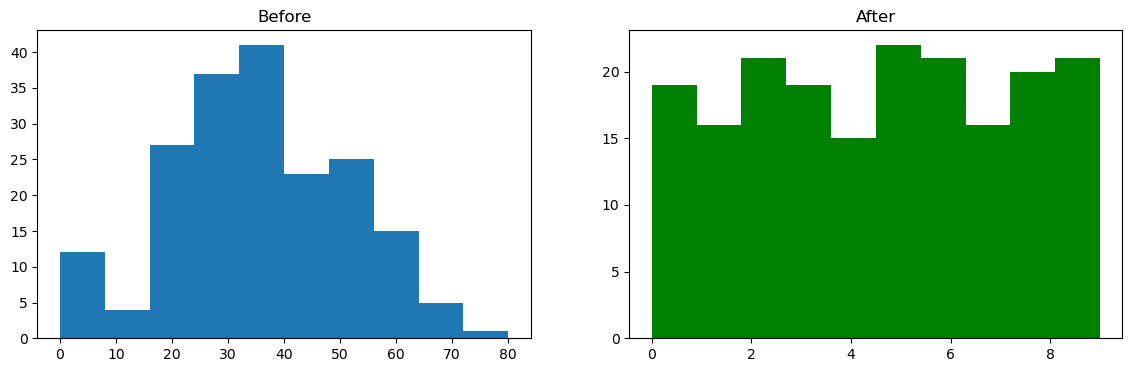

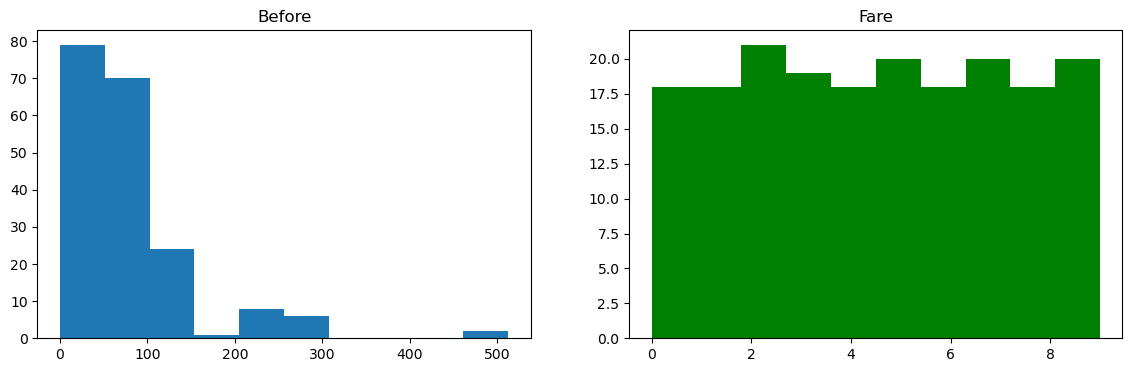

In [48]:
discretize(10, 'quantile')

0.6631578947368421


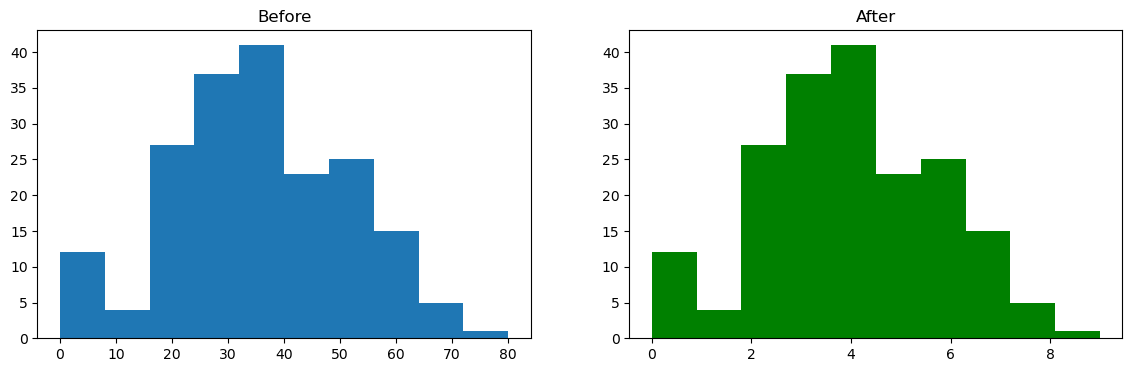

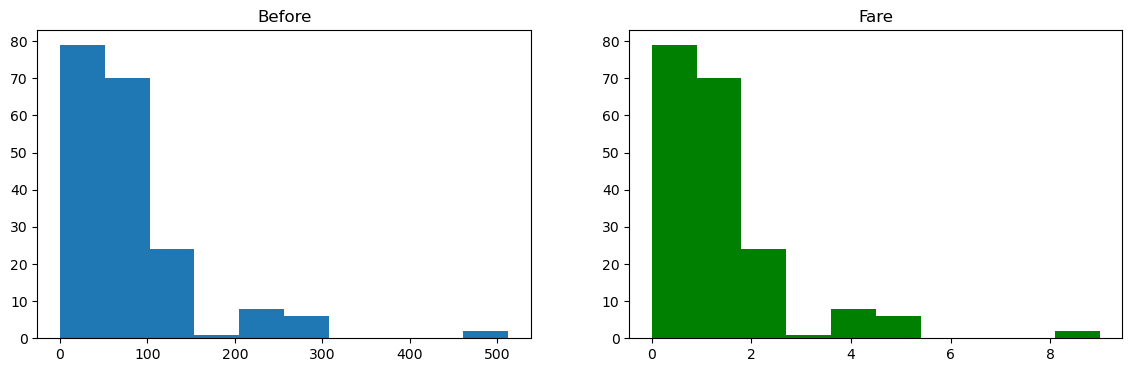

In [49]:
discretize(10, 'uniform')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.663157894736842


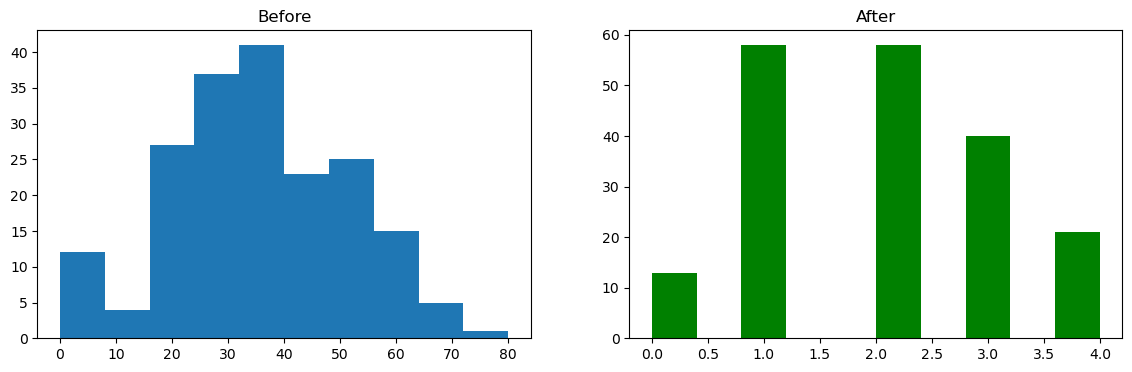

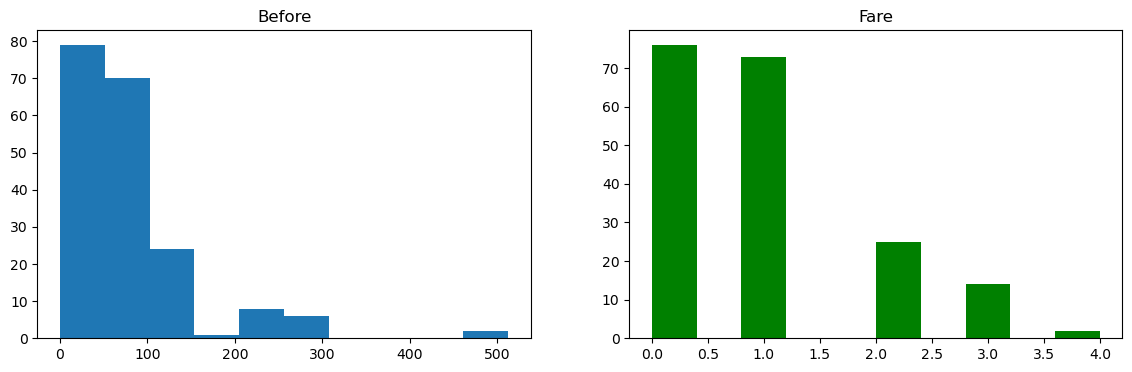

In [54]:
discretize(5, 'kmeans')